In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%pip install transformers
%pip install numpy
%pip install tensorflow
%pip install scikit-learn
%pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.8 MB/s eta 0:00:00


In [4]:
import pandas as pd

In [5]:
train_df = pd.read_csv('gdrive/My Drive/anlp_project/train_preprocessed_df_setfit.csv')
test_df = pd.read_csv('gdrive/My Drive/anlp_project/test_preprocessed_df_setfit.csv')

In [6]:
train_df.columns

Index(['Unnamed: 0', 'Tweet index', 'Label', 'Tweet text', 'text_prep',
       'tweet_tokens', 'tweet_prep'],
      dtype='object')

In [14]:
from transformers import TFRobertaModel, RobertaConfig, RobertaTokenizer
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import os
import random
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import random
import sys
import math
from scipy import stats
from scipy.spatial import distance
import random
import os
from transformers import BertTokenizer
from transformers import DistilBertTokenizer, RobertaTokenizer, BertConfig, TFBertModel, BertTokenizer

In [7]:

# Roberta implementation

BERT_MODEL = "roberta-base"  # Specify the RoBERTa model
MAX_LENGTH = 128
TEST_SIZE = 0.1
SEED = 42

USE_ATT = True

BERT_DROPOUT = 0.2
LSTM_UNITS = 512
DENSE_UNITS = 50
LSTM_DROPOUT = 0.1
DENSE_DROPOUT = 0.2
EPOCHS = 10 #(Default 10)
BATCH_SIZE = 32

def tokenize(sentences, tokenizer):
    input_ids, input_masks = [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence,
                                       add_special_tokens=True,
                                       max_length=MAX_LENGTH,
                                       pad_to_max_length=True,
                                       return_attention_mask=True,
                                       return_token_type_ids=False)  # Roberta doesn't use token_type_ids
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])

    return (np.asarray(input_ids, dtype='int32'),
            np.asarray(input_masks, dtype='int32'))

    ## Define base Roberta configs
# config = RobertaConfig(dropout=BERT_DROPOUT,
#                        attention_dropout=BERT_DROPOUT,
#                        output_attentions=True)

config = RobertaConfig.from_pretrained(BERT_MODEL,
                                       output_hidden_states=False,
                                       attention_probs_dropout_prob =BERT_DROPOUT,
                                       output_attentions = True)
config.output_hidden_states = False
transformer_model = TFRobertaModel.from_pretrained(BERT_MODEL, config=config)

# Freeze the pre-trained layers for fine-tuning
for layer in transformer_model.layers[:3]:
    layer.trainable = False

# Defining tokenizer
tokenizer = RobertaTokenizer.from_pretrained(BERT_MODEL,
                                             add_special_tokens=True,
                                             max_length=MAX_LENGTH,
                                             pad_to_max_length=True)






Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
# DistillBert implementation

In [17]:
BERT_MODEL = "bert-base-uncased"
MAX_LENGTH = 128
#TEST_SIZE = 0.2
SEED = 42

USE_ATT = True

BERT_DROPOUT = 0.1
LSTM_UNITS = 50
DENSE_UNITS = 50
LSTM_DROPOUT = 0.1
DENSE_DROPOUT = 0.2
EPOCHS = 2 #(Default 10)
BATCH_SIZE = 32

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence,
                                       add_special_tokens=True,
                                       max_length=MAX_LENGTH,
                                       pad_to_max_length=True,
                                       return_attention_mask=True,
                                       return_token_type_ids=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])

    return np.asarray(input_ids, dtype='int32'), np.asarray(
        input_masks, dtype='int32'), np.asarray(input_segments, dtype='int32')


## Define base bert configs
config = BertConfig(dropout=BERT_DROPOUT,
                    attention_dropout=BERT_DROPOUT,
                    output_attentions=True)
config.output_hidden_states = False
transformer_model = TFBertModel.from_pretrained(BERT_MODEL, config=config)
for layer in transformer_model.layers[:3]:  ## We are freezing first 3 layers
    layer.trainable = False

# Defining tokonizer
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL,
                                                do_lower_case=True,
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH,
                                                pad_to_max_length=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [11]:
from transformers import TFRobertaModel, RobertaTokenizer
from tqdm import tqdm
import numpy as np

BERTWEET_MODEL = "vinai/bertweet-large"
MAX_LENGTH = 128
SEED = 42

USE_ATT = True

LSTM_UNITS = 50
DENSE_UNITS = 50
LSTM_DROPOUT = 0.1
DENSE_DROPOUT = 0.1
EPOCHS = 2
BATCH_SIZE = 16

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence,
                                       add_special_tokens=True,
                                       max_length=MAX_LENGTH,
                                       pad_to_max_length=True,
                                       return_attention_mask=True,
                                       return_token_type_ids=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])

    return np.asarray(input_ids, dtype='int32'), np.asarray(
        input_masks, dtype='int32'), np.asarray(input_segments, dtype='int32')

# Load tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained(BERTWEET_MODEL)
transformer_model = TFRobertaModel.from_pretrained(BERTWEET_MODEL)

# Freezing first 3 layers of the model
for layer in transformer_model.roberta.encoder.layer[:3]:
    layer.trainable = False


Some layers from the model checkpoint at vinai/bertweet-large were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFRobertaModel were not initialized from the model checkpoint at vinai/bertweet-large and are newly initialized: ['roberta/pooler/dense/bias:0', 'roberta/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
def random_seed(SEED):
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

random_seed(SEED)

In [16]:
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
import numpy as np

# ... [Assuming transformer_model, tokenizer, and other necessary functions and variables are defined] ...

input_ids_in = tf.keras.layers.Input(shape=(MAX_LENGTH, ),
                                     name='input_token',
                                     dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(MAX_LENGTH, ),
                                       name='masked_token',
                                       dtype='int32')
embedding_layer = transformer_model(input_ids_in,
                                    attention_mask=input_masks_in)[0]
X = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(LSTM_UNITS,
                         return_sequences=True,
                         dropout=LSTM_DROPOUT,
                         recurrent_dropout=LSTM_DROPOUT,
                         kernel_initializer='normal'))(embedding_layer)
if USE_ATT:
    X = tf.keras.layers.Attention(use_scale=True)([X, X])  # Use attention.
X = tf.keras.layers.GlobalMaxPool1D()(X)
X = tf.keras.layers.Dense(DENSE_UNITS,
                          activation='relu',
                          kernel_initializer='normal')(X)
X = tf.keras.layers.Dropout(DENSE_DROPOUT)(X)
X = tf.keras.layers.Dense(
    1,
    activation='sigmoid',  # Change to sigmoid for binary classification.
    kernel_initializer='normal')(X)
model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs=X)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Change to binary_crossentropy for binary classification.
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])  # Adjusted metrics.
model.summary()

input_data = train_df

train_labels = []
train_sentences = []

for i in range(len(input_data)):
    train_labels.append(int(input_data['Label'][i]))
    train_sentences.append(input_data['tweet_prep'][i])

c = list(zip(train_labels, train_sentences))
random.shuffle(c)
train_labels, train_sentences = zip(*c)


test_input_data = test_df
test_labels = []
test_sentences = []

for i in range(len(test_input_data)):
    test_labels.append(int(test_input_data['Label'][i]))
    test_sentences.append(test_input_data['tweet_prep'][i])

test_c = list(zip(test_labels, test_sentences))
random.shuffle(test_c)
test_labels, test_sentences = zip(*test_c)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 128)]                0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 128)]                0         []                            
                                                                                                  
 tf_roberta_model_2 (TFRobe  TFBaseModelOutputWithPooli   3553597   ['input_token[0][0]',         
 rtaModel)                   ngAndCrossAttentions(last_   44         'masked_token[0][0]']        
                             hidden_state=(None, 128, 1                                           
                             024),                                                            

In [19]:
# Roberta implementation
train_input_ids, train_input_masks = tokenize(
    train_sentences, tokenizer)
y_tr = np.asarray(train_labels)

test_input_ids, test_input_masks = tokenize(
    test_sentences, tokenizer)
y_te = np.asarray(test_labels)

In [18]:
#Bert implementation
train_input_ids, train_input_masks, train_input_segment = tokenize(
    train_sentences, tokenizer)
test_input_ids, test_input_masks, test_input_segment = tokenize(
    test_sentences, tokenizer)
y_tr = np.asarray(train_labels)
y_te = np.asarray(test_labels)

100%|██████████| 784/784 [00:00<00:00, 2986.02it/s]


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Training the model
model.fit(x=[train_input_ids, train_input_masks],
          y=y_tr,
          epochs=5,
          validation_split=0.01,
          batch_size=BATCH_SIZE)


results = model.evaluate(x=[test_input_ids, test_input_masks], y=y_te)
print(f"Loss: {results[0]}, Accuracy: {results[1]}")

# Predictions
predictions = model.predict(x=[test_input_ids, test_input_masks])
raw_predictions = predictions
#raw_predictions = model.predict(x=[test_input_ids, test_input_masks])
predictions = np.round(predictions).flatten()  # Rounding to get binary predictions

# Evaluation metrics
accuracy = accuracy_score(y_te, predictions)
precision = precision_score(y_te, predictions)
recall = recall_score(y_te, predictions)
f1 = f1_score(y_te, predictions)
auc = roc_auc_score(y_te, raw_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")

Epoch 1/5


237/237 [==============================] - 725s 3s/step - loss: 0.6942 - accuracy: 0.5037 - auc: 0.4924 - val_loss: 0.6900 - val_accuracy: 0.5897 - val_auc: 0.5000
Epoch 2/5
237/237 [==============================] - 605s 3s/step - loss: 0.6933 - accuracy: 0.4918 - auc: 0.4892 - val_loss: 0.6923 - val_accuracy: 0.5897 - val_auc: 0.5000
Epoch 3/5
237/237 [==============================] - 608s 3s/step - loss: 0.6932 - accuracy: 0.5011 - auc: 0.4881 - val_loss: 0.6918 - val_accuracy: 0.5897 - val_auc: 0.5000
Epoch 4/5
237/237 [==============================] - 602s 3s/step - loss: 0.6932 - accuracy: 0.5005 - auc: 0.4960 - val_loss: 0.6929 - val_accuracy: 0.5897 - val_auc: 0.5000
Epoch 5/5
25/25 [==============================] - 22s 869ms/step - loss: 0.6929 - accuracy: 0.6033 - auc: 0.5000
Loss: 0.6928810477256775, Accuracy: 0.6033163070678711
25/25 [==============================] - 28s 868ms/step
Accuracy: 0.6033163265306123
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Roberta Bilstm
Accuracy: 0.6173469387755102
Precision: 0.6170212765957447
Recall: 0.0932475884244373
F1 Score: 0.16201117318435754
AUC: 0.6731133967356207

SyntaxError: ignored

In [ ]:
#Bert bilstm
Accuracy: 0.6989795918367347
Precision: 0.6005361930294906
Recall: 0.7202572347266881
F1 Score: 0.6549707602339181
AUC: 0.7671019625704438

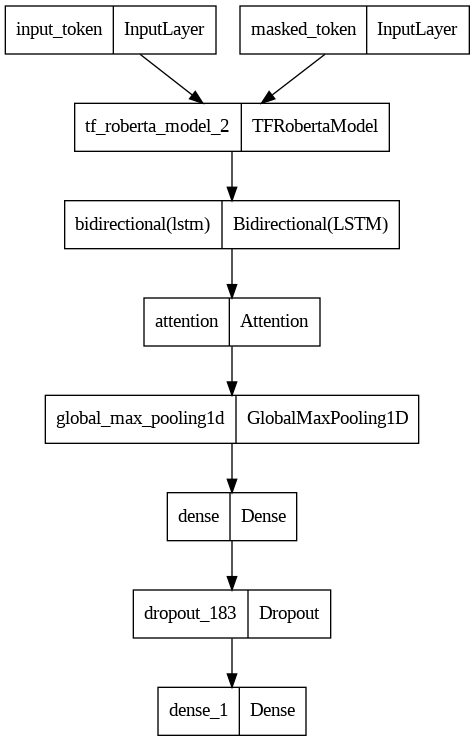

In [21]:
tf.keras.utils.plot_model(
    model,
    to_file='model_1.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)